## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import glob
import os
import matplotlib.image as mpimg

import sys
sys.path.append('../src')
from utils import plot_spectrum, filename_from_metadata, load_dataset

# Data Analysis

* 23400 samples 
* average of 334 samples per class, only 4 of them have less than 300 samples
* we have 3 systems - first system has the vast majority of data
* first system has 40 M/F unique values, second system has 13 M/F unique values, third system has 5 M/F unique values
* we have 31 unique numbers which represent order of measurements
* we have 70 unique compounds that are present in all 3 systems
* there is a class (compound) imbalance with 38 std
* each file contains a single spectrum with 801 values (time-series)

### Filename format

`F01_01 M20_06_system1` = metadata about the annotator
`F` - female (gender of annotator)
`01` - identificator of the annotator 
`_01` - first measurement done by the annotator
`system_1/2/3` = three columns, same, but when switching a columns a large shift occurs

In [2]:
data = load_dataset(data_dir='../data/id/', dataset_name='spectrum_exported', verbose=True)
X, y, metadata = data['data_points'], data['data_labels'], data['metadata']
spectrum_systems = metadata

[INFO] Loading dataset spectrum_exported.
[INFO] Dataset spectrum_exported loaded loaded in 6.9 seconds.
[INFO] Input data shapes: X[(23430, 801)], y[(23430,)]


In [3]:
spectrum_systems.nunique()

system                 3
annotator_ID          40
measurement_number    31
compound              70
dtype: int64

In [10]:
spectrum_systems[spectrum_systems['measurement_number'] == '31'].value_counts()

system  annotator_ID  measurement_number  compound                                         
3       F15           31                  1-Decanol, 2-hexyl-                                  1
                                          Methoxyacetic acid, dodecyl ester                    1
                                          Fumaric acid, 2-dimethylaminoethyl heptyl ester      1
                                          Fumaric acid, 2-dimethylaminoethyl nonyl ester       1
                                          Fumaric acid, 2-dimethylaminoethyl tridecyl ester    1
                                                                                              ..
                                          Cholesta-3,5-diene (izomer 2)                        1
                                          Cholesta-4,6-dien-3-one                              1
                                          Cholesterol                                          1
                                   

In [90]:
females.values.sum(), females.values.sum()

23430

In [137]:
female_total / (male_total + female_total), male_total / (male_total + female_total)

(0.6168160478019633, 0.3831839521980367)

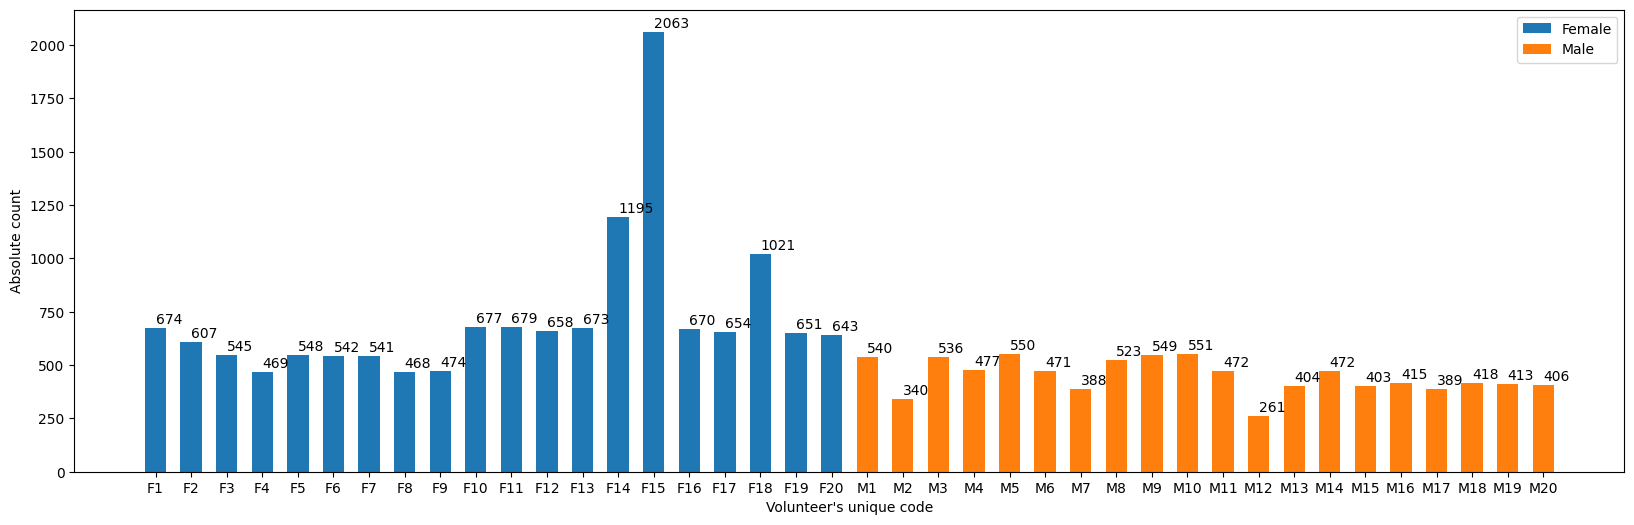

<BarContainer object of 1 artists>

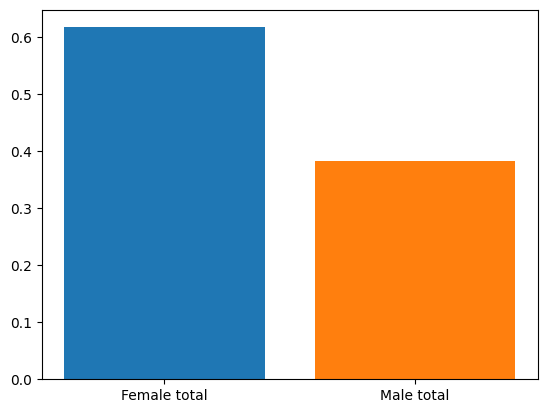

In [136]:
import re

annotators = spectrum_systems['annotator_ID'].value_counts().sort_index(
    key=lambda x: [f'{id[0]}{int(id[1:]):02d}' for id in x], ascending=True)

females = annotators[:20]
males = annotators[20:]
female_total = females.sum()
male_total = males.sum()
plt.figure(figsize=(20, 6))
plt.bar(females.index, females.values, width=0.6, label='Female')
plt.bar(males.index, males.values, width=0.6, label='Male')
for i, cnt in enumerate(females):
    plt.annotate(f'{cnt}', (females.index[i], cnt+20), color='black')
for i, cnt in enumerate(males):
    plt.annotate(f'{cnt}', (males.index[i], cnt+20), color='black')

plt.xlabel('Volunteer\'s unique code')
plt.ylabel('Absolute count')
plt.legend()
plt.show()

plt.bar('Female total', female_total / (male_total + female_total), label='Female total')
plt.bar('Male total', male_total / (male_total + female_total), label='Male total')
plt.annotate(f'{cnt}', (females.index[i], cnt+20), color='black')

In [3]:
spectrum_systems['system'].value_counts() 

1    18467
2     3174
3     1789
Name: system, dtype: int64

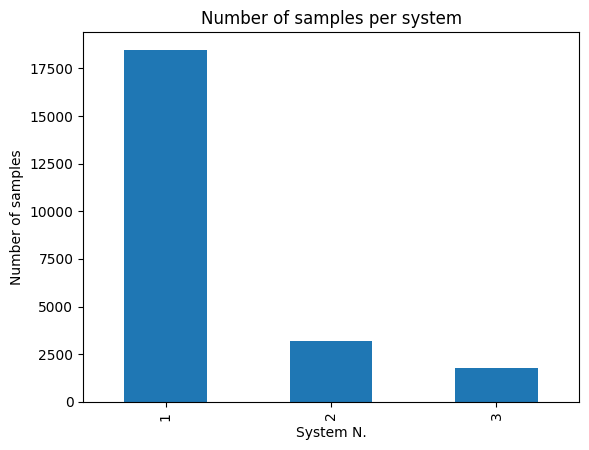

In [11]:
spectrum_systems['system'].value_counts().plot(kind='bar')
plt.title('Number of samples per system')
plt.ylabel('Number of samples')
plt.xlabel('System N.')
plt.show()

### Number of samples per class (compound)

count     70.000000
mean     334.714286
std       37.805813
min      127.000000
25%      340.000000
50%      346.000000
75%      348.000000
max      349.000000
Name: compound, dtype: float64
Hexaethylene glycol monododecyl ether           127
Pentaethylene glycol monododecyl ether          172
Benzoic acid, 2-hydroxy-, phenylmethyl ester    208
Tetraethylene glycol monododecyl ether          284
Caffeine                                        301
                                               ... 
Heptacosane                                     349
Tetradecane, 1-chloro-                          349
2,5-pyrrolidinedione, 3-decyl-                  349
9-Hexadecenoic acid, tetradecyl ester           349
Hexadecanoic acid, tetradecyl ester             349
Name: compound, Length: 70, dtype: int64


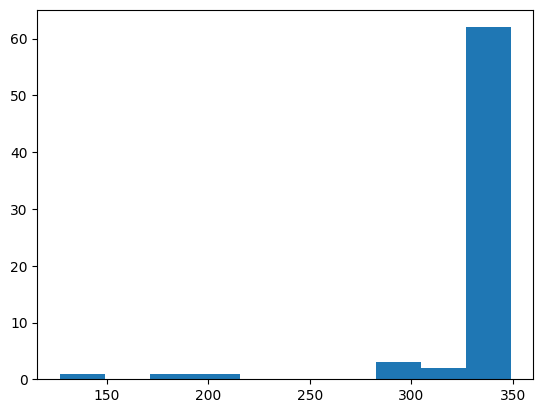

In [135]:
%matplotlib inline

print(spectrum_systems['compound'].value_counts().describe())
print("================")
print(spectrum_systems['compound'].value_counts().sort_values())
plt.hist(spectrum_systems['compound'].value_counts())
plt.show()

### Number of annotated compounds grouped by indidivual annotators

In [10]:
spectrum_systems.groupby(['annotator_ID', 'measurement_number', 'system']).count()

compound
annotator_ID measurement_number system          
F1           01                 1             66
             02                 1             64
             03                 1             70
             04                 1             69
             05                 1             70
...                                          ...
M9           04                 1             70
             05                 1             70
             06                 1             69
             07                 1             70
             08                 1             70

[349 rows x 1 columns]

### Show multiple spectrums look from with same compound

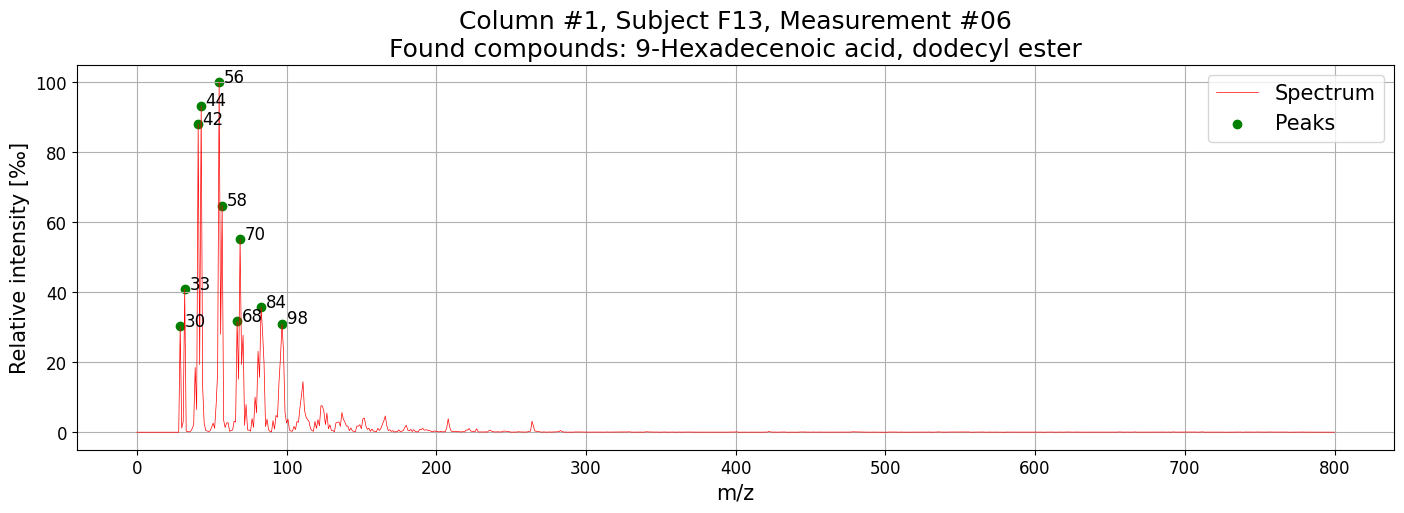

In [3]:
# normalize data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='max')
displayed_data = normalizer.fit_transform(X)

for i in range(1, 2, 1):
    spectrum = displayed_data[i]
    plot_spectrum(spectrum, metadata.iloc[i], save_plot=True, figsize=(17, 5), top_n=10)